In [49]:
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("/Users/lucasmazza/Desktop/airbnb.csv")

In [51]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [52]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [53]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [54]:
#removing null entries
df = df[df['name'].notna()]
df = df[df['host_name'].notna()]

In [20]:
sumData = df.describe()
sumData = sumData.transpose()
sumData.head()

,count,mean,std,min,25%,50%,75%,max
id,48858.0,1.902335e+07,1.098289e+07,2539.00000,9.475980e+06,1.969114e+07,2.915765e+07,3.648724e+07
host_id,48858.0,6.763169e+07,7.862389e+07,2438.00000,7.818669e+06,3.079133e+07,1.074344e+08,2.743213e+08
latitude,48858.0,4.072894e+01,5.452770e-02,40.49979,4.069009e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48858.0,-7.395217e+01,4.615939e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393628e+01,-7.371299e+01
price,48858.0,1.527403e+02,2.402324e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04


In [166]:
newSet = df[['latitude','longitude','neighbourhood_group','room_type','price']].copy()
#set the neighborhood_group
newSet = newSet.loc[newSet['neighbourhood_group'] =='Brooklyn']
#type of room is only "Entire home/apt"
newSet = newSet.loc[newSet['room_type'] =='Entire home/apt']
#only entries with price larger than the data sets average
newSet = newSet.loc[newSet['price'] >= 153]
#clustering will be done with lat and long values
finalSet = newSet[['latitude','longitude']]

finalSet

,latitude,longitude
16,40.69169,-73.97185
20,40.71842,-73.95718
52,40.70420,-73.93560
63,40.67811,-73.96428
66,40.67343,-73.98338
...,...,...
48831,40.71391,-73.94431
48848,40.67198,-73.95329
48856,40.68886,-73.92879
48873,40.63116,-73.92616


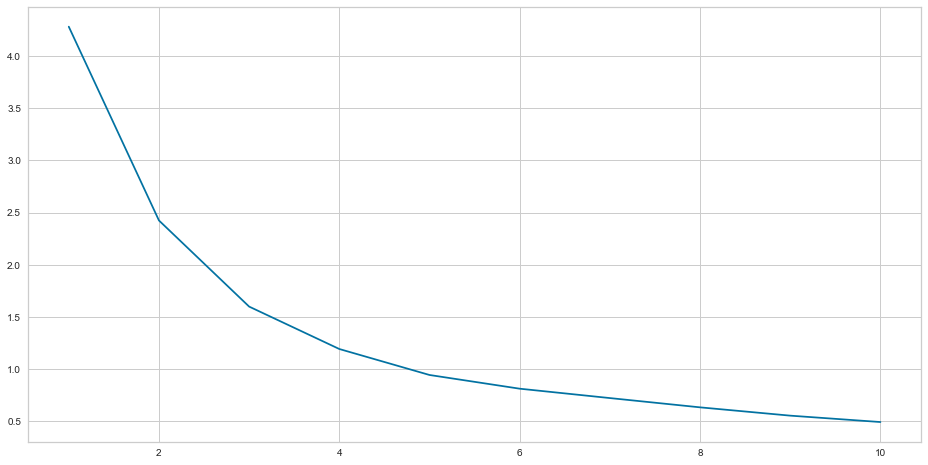

In [167]:
distortions = []
plt.figure(figsize=(16,8))
K = range(1,11)
for k in K: 
    Kmean = KMeans(n_clusters = k)
    Kmean.fit(finalSet)
    distortions.append(Kmean.inertia_)

plt.plot(K, distortions, 'bx-')

#Elbow visually indicated to be 6
#sum of cluster of squares begins to decrease linearly

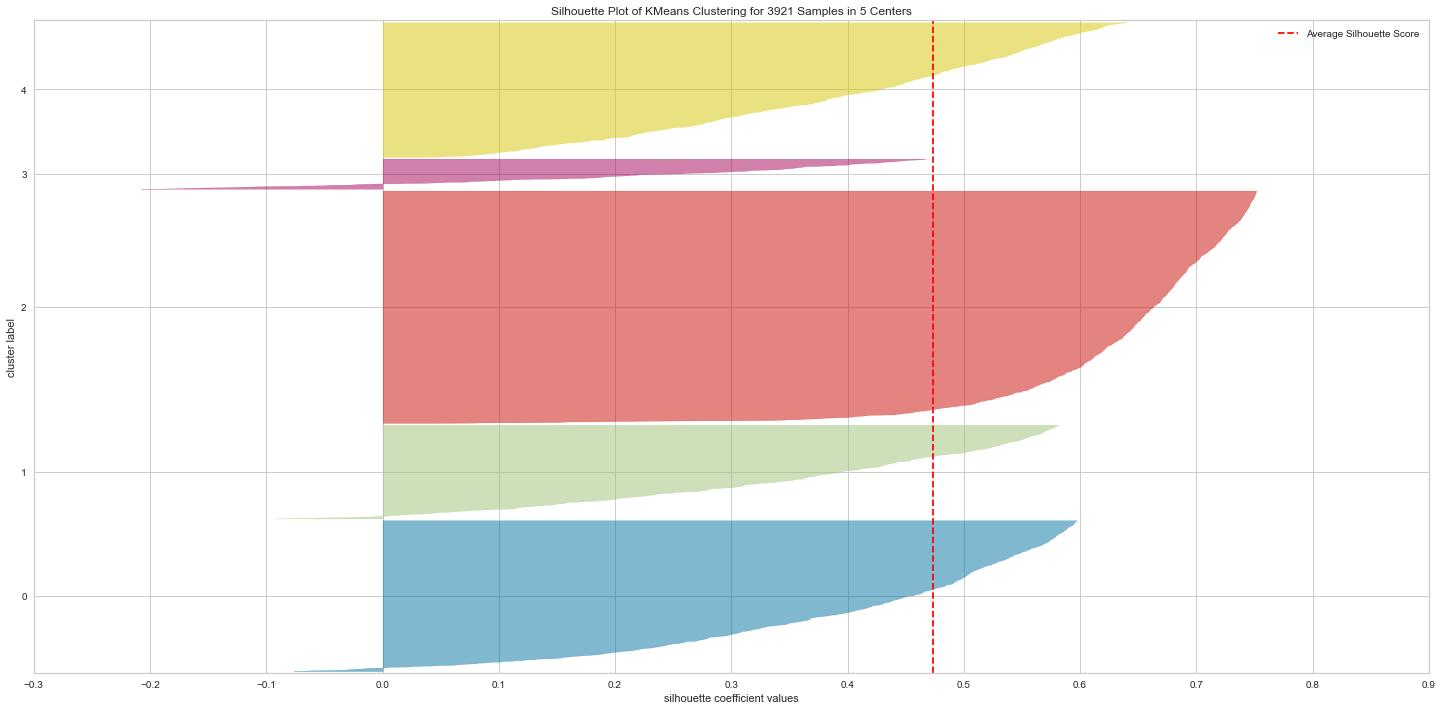

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3921 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [121]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
plt.figure(figsize=(25,12))
visualizer.fit(finalSet)        # Fit the data to the visualizer
visualizer.show() 


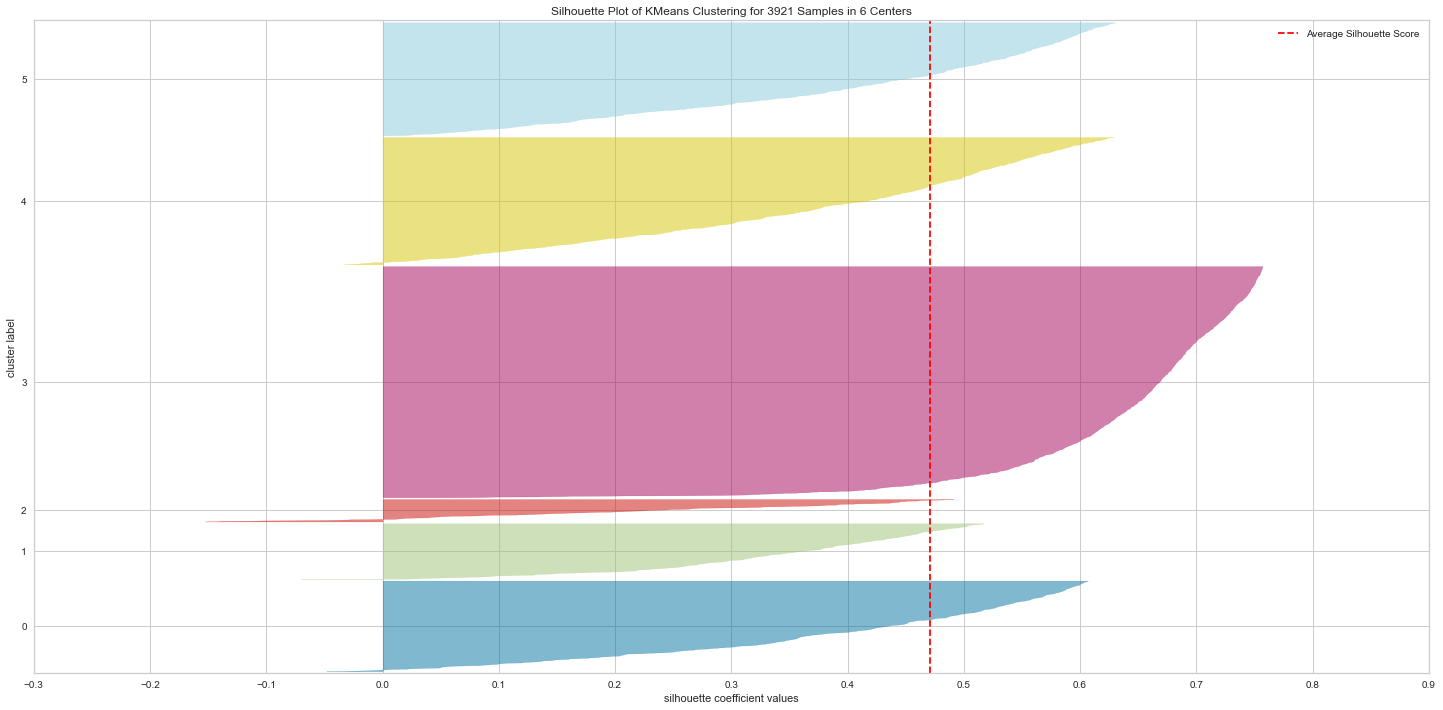

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3921 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [139]:
model = KMeans(6)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
plt.figure(figsize=(25,12))
visualizer.fit(finalSet)        # Fit the data to the visualizer
visualizer.show() 
#slightly more area covered by the average, more area above average
#a little more standard in shape than 5

In [144]:
#find centroids for n = 6
KmeanS = KMeans(n_clusters=6)
KmeanS.fit(finalSet)
KmeanS.cluster_centers_
KmeanS.labels_

array([2, 0, 3, ..., 3, 1, 0], dtype=int32)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

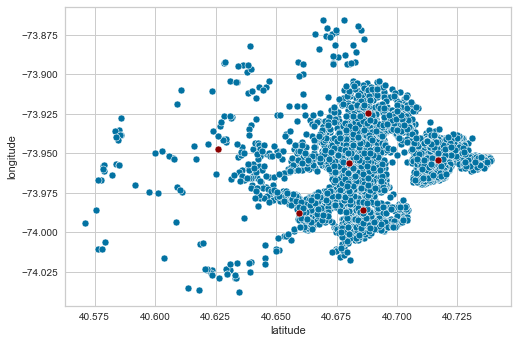

In [141]:

dataCentroids = pd.DataFrame([[ 40.68818561, -73.92437669],
       [ 40.71687675, -73.95424817],
       [ 40.68574887, -73.98560003],
       [ 40.68032383, -73.95626492],
       [ 40.62607551, -73.94713833],
       [ 40.65965715, -73.98749564]], columns = ['x','y'])

sns.scatterplot(data = finalSet, x = 'latitude', y = 'longitude')
sns.scatterplot(data = dataCentroids, x = 'x', y = 'y',color = 'darkred')
#centroids colored in red

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

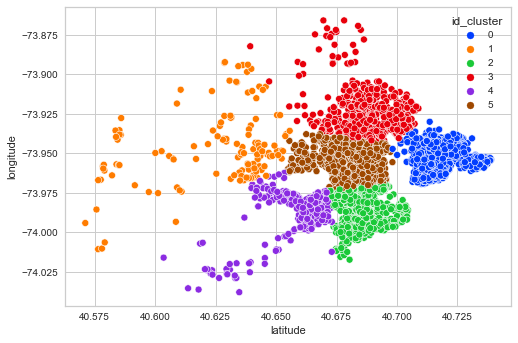

In [162]:
finalSet['id_cluster'] = KmeanS.labels_
finalSet.head()
sns.scatterplot(data = finalSet, x = 'latitude', y = 'longitude',hue = 'id_cluster',palette = 'bright')

In [163]:
test =np.array([40.54,-73.10])
Stest=test.reshape(1, -1)
KmeanS.predict(Stest)
#test point is assigned to the 3rd cluster

/Users/lucasmazza/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)